In [5]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.io import read_raw_fif
from mne.datasets import sample
from mne.preprocessing import find_eog_events


In [3]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

In [6]:
raw = read_raw_fif(raw_fname)
event_id = 9 # 自定义eog事件的id为9
eog_events = find_eog_events(raw,event_id)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 2048 samples (13.639 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 2048 samples (13.639 sec) selected
Now detecting blinks and generating corresponding events
Number of EOG events detected : 46


In [10]:
print("eog events:",eog_events.shape)
eog_events

('eog events:', (46, 3))


array([[ 6525,     0,     9],
       [ 6797,     0,     9],
       [ 7001,     0,     9],
       [ 8621,     0,     9],
       [11031,     0,     9],
       [11348,     0,     9],
       [13038,     0,     9],
       [15025,     0,     9],
       [15137,     0,     9],
       [15330,     0,     9],
       [15471,     0,     9],
       [15770,     0,     9],
       [17141,     0,     9],
       [21557,     0,     9],
       [21735,     0,     9],
       [21811,     0,     9],
       [23467,     0,     9],
       [24751,     0,     9],
       [25086,     0,     9],
       [25672,     0,     9],
       [26046,     0,     9],
       [26500,     0,     9],
       [26629,     0,     9],
       [27114,     0,     9],
       [27467,     0,     9],
       [27724,     0,     9],
       [27857,     0,     9],
       [28143,     0,     9],
       [28574,     0,     9],
       [29641,     0,     9],
       [31902,     0,     9],
       [32688,     0,     9],
       [32803,     0,     9],
       [34

In [8]:
tmin,tmax=-0.2,0.2 #定义事件的时间起止长度
# Read epochs
picks = mne.pick_types(raw.info,meg=False,eeg=False,stim=False,
                      eog=True,exclude='bads')
epochs = mne.Epochs(raw,eog_events,event_id,tmin,tmax,picks=picks)


46 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
4 projection items activated


In [13]:
data = epochs.get_data()
print("Number of detected EOG artifacts : %d" % len(data))

Loading data for 46 events and 61 original time points ...
Number of detected EOG artifacts : 46


In [15]:
data.shape

(46, 1, 61)

In [18]:
# 把中间的1维度压缩掉,并转置
np.squeeze(data).T.shape

(61, 46)

In [20]:
epochs.times.shape

(61,)

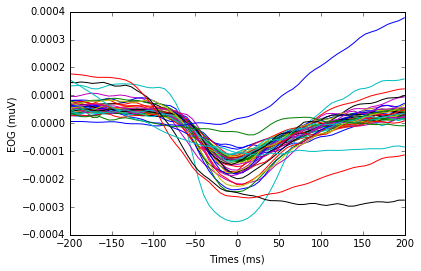

In [16]:
# Plot EOG artifacts
plt.plot(1e3 * epochs.times, np.squeeze(data).T)
plt.xlabel('Times (ms)')
plt.ylabel('EOG (muV)')
plt.show()

### Reference
- https://martinos.org/mne/stable/auto_examples/preprocessing/plot_find_eog_artifacts.html#sphx-glr-auto-examples-preprocessing-plot-find-eog-artifacts-py